# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# Analysis:
# There are 248 unique mice and 10 regimens in the test.
# Of the ten drug regimens Capomulin had the smallest average, median  tumor  and SEM size measurements.
# The second best regimen is Caftamen.
# Mouse gender is nearly equal with 49% male and 51% female.
# There are potential outliers except in Infubinol, Caftamen, Ramicane and Capomulion.
# As mouse weight increases, so does the size of the tumor. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(df.shape)
df.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_complete = df["Mouse ID"] != "g989"
df2 = df.loc[clean_study_complete].reset_index(drop=True)
df2.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor SEM": tumor_sem
}

leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.320930,50.446266,43.852013
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
leaderboard2 = df2.groupby(["Drug Regimen"]).agg(cols_agg).reset_index()
leaderboard2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Counts'}, xlabel='Drug Regimen'>

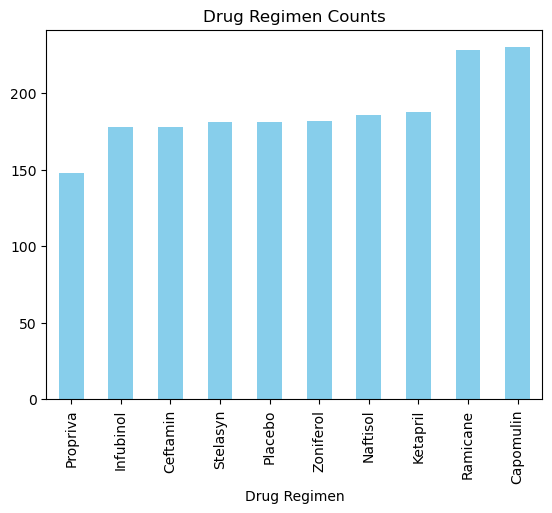

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2["Drug Regimen"].value_counts().sort_values().plot(kind="bar", title="Drug Regimen Counts", color="skyblue")


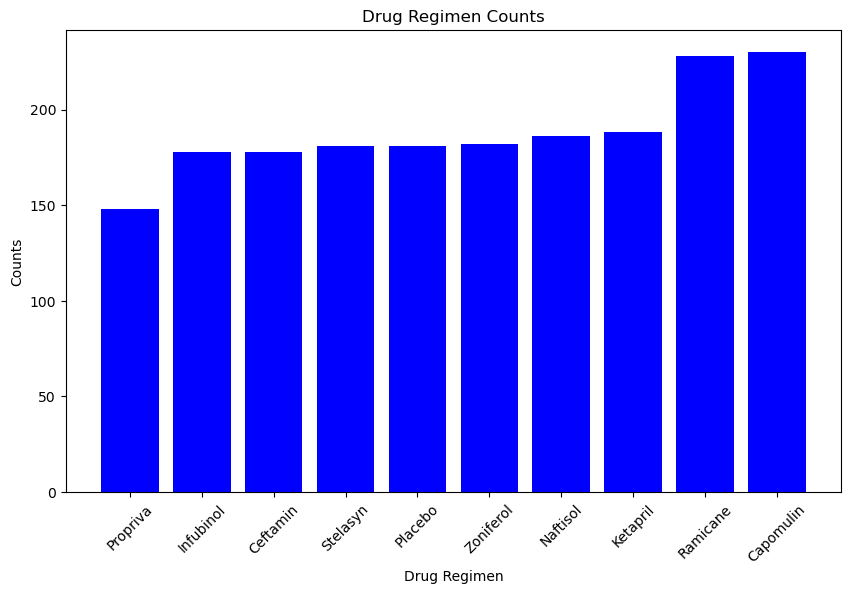

In [10]:
# pyplot bar chart
# Get the value counts for each drug regimen
drug_regimen_counts = df2["Drug Regimen"].value_counts().sort_values()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.title('Drug Regimen Counts')
plt.xticks(rotation=45)
plt.show()



In [11]:
clean_study_complete = df["Mouse ID"] != "g989"
clean_study_complete

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2["Sex"].value_counts()

Sex
Male      958
Female    922
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

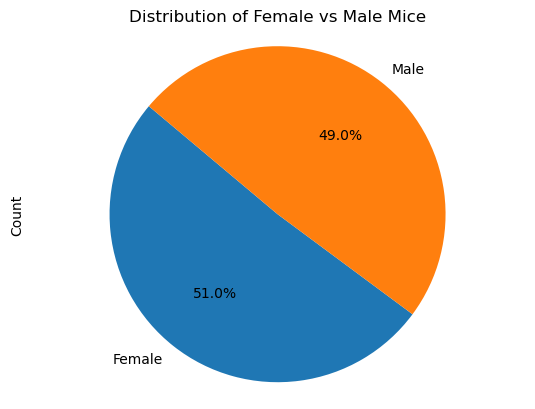

In [13]:
# pandas pie chart
data = {'Gender': ['Female', 'Male'], 'Count': [958, 922]}
df = pd.DataFrame(data)

# Create the pie chart
df.plot(kind='pie', y='Count', labels=df['Gender'], autopct='%1.1f%%', startangle=140, legend=False)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')


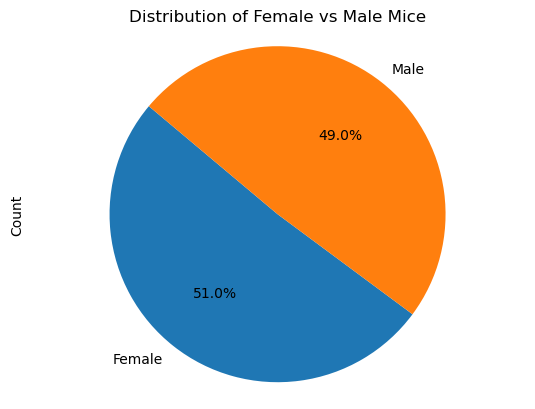

In [14]:
# pyplot pie chart

labels = ['Female', 'Male']
sizes = [958, 922]

df.plot(kind='pie', y='Count', labels=df['Gender'], autopct='%1.1f%%', startangle=140, legend=False)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

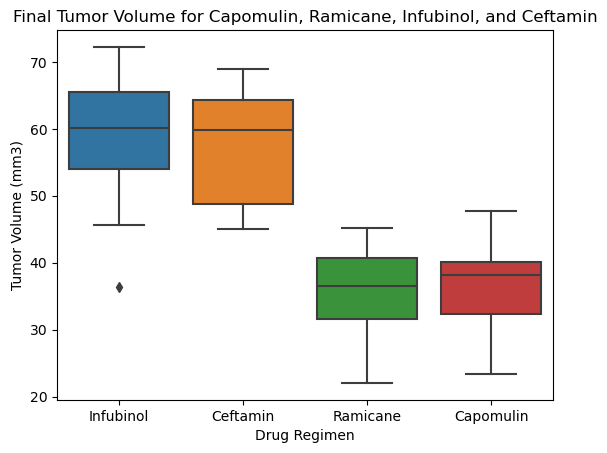

In [15]:
# with help from xpert
# Filter the DataFrame to include only the four treatment regimens
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_four_treatments = df2[df2["Drug Regimen"].isin(four_treatments)]

# Group by "Mouse ID" to get the last (greatest) timepoint for each mouse
max_tumor = df_four_treatments.groupby("Mouse ID")["Timepoint"].max()

# Merge the group with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_tumor, df_four_treatments, on=["Mouse ID", "Timepoint"], how="left")

# Create a box plot to visualize the final tumor volume for each mouse in the four treatment regimens
sns.boxplot(data=merged_data, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.title("Final Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin")
plt.show()


In [16]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Create an empty list to fill with tumor volume data:
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers:

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df2.loc[df2["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add subset
    tumor_volume_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")







Potential outliers for Capomulin: 1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 1801    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ketapril'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Stelasyn'),
  Text(5, 0, 'Ramicane'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Propriva'),
  Text(8, 0, 'Placebo'),
  Text(9, 0, 'Ceftamin')])

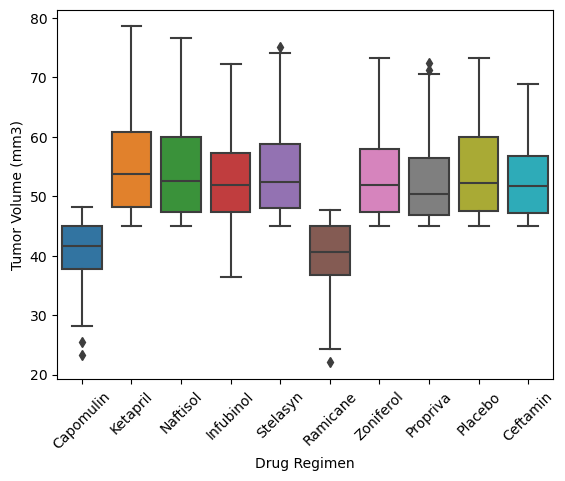

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")

# Rotate the x-axis labels to 45 degrees
plt.xticks(rotation=45)

## Line and Scatter Plots

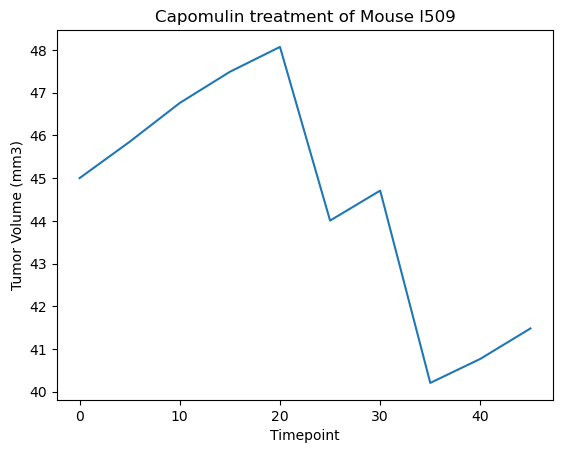

In [18]:
# help from xpert and office hours
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = df2[df2["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table[capomulin_table["Mouse ID"] == 'l509']

plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse l509')
plt.show()


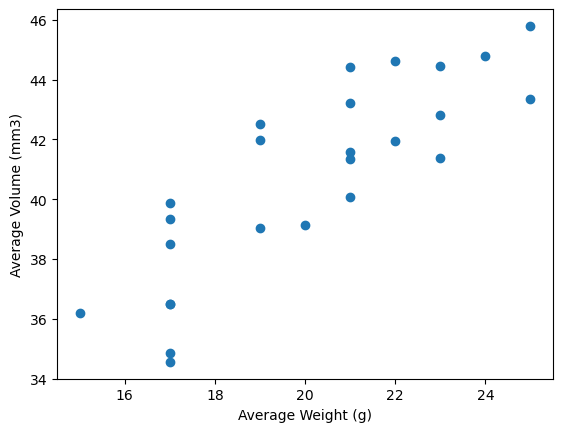

In [19]:
# help from office hours
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = df2.loc[df2["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.5256995552077175
Regression Line Equation: y = 0.96x + 21.49


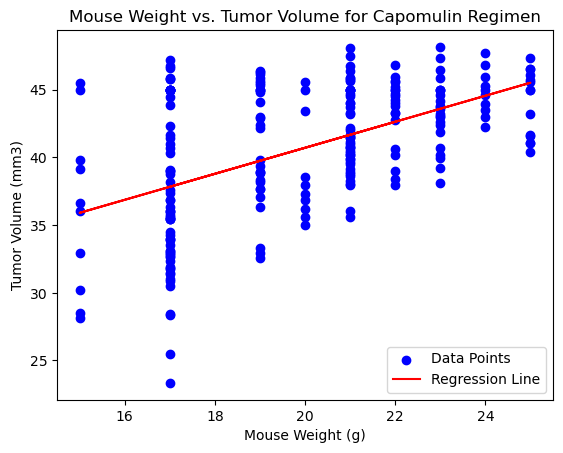

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Assuming you have a DataFrame named 'df' containing the data

# Filter the data for the Capomulin regimen
capomulin_data = df2[df2['Drug Regimen'] == 'Capomulin']

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression for mouse weight and average observed tumor volume
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Create the regression line equation
regression_line = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"Regression Line Equation: {regression_line}")

# Plot the data points and the regression line
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Tumor Volume for Capomulin Regimen')
plt.legend()
plt.show()
